# 4 Signature v2 Implementation

## 4.1 Introduction

In Chapter 3 we devised a signature v2 algorithm.

In this chapter we implement it and use it.

## 4.2 The source

Attached to this document you can find two files
- graph_signature_v2.py : The entire implementation of the signature v2 algorithm
- utils.py : A few optional utility function used for illustrating this notebook.


## 4.3 The NodeSignature class

this class is #todo

### 4.3.1 Check NodeSignature Comparer Inequality

Verifies compare_signatures correctly orders distinct signatures based on all priority rules.

In [1]:
from graph_signature_v2 import Node, NodeSignature, compare_signatures
from utils import check, node_signature

check(
    """.1 {neighbour_count:4} is shown before {neighbour_count:3}""",
    compare_signatures(
        node_signature(label="A", neighbour_count=4),
        node_signature(label="B", neighbour_count=3),
    )
    < 0,
)

check(
    """.2 {final_index:3} is shown before {final_index:4}""",
    compare_signatures(
        node_signature(label="A", final_index=3, neighbour_count=1),
        node_signature(label="B", final_index=4, neighbour_count=1),
    )
    < 0,
)

check(
    """.3 {loop_length:3} is shown before {loop_length:4}""",
    compare_signatures(
        node_signature(label="A", loop_length=3, neighbour_count=1),
        node_signature(label="B", loop_length=4, neighbour_count=1),
    )
    < 0,
)

check(
    """.4 {resolution_step:1} is shown before {resolution_step:2}""",
    compare_signatures(
        node_signature(label="A", final_index=0,
                      neighbour_count=1, resolution_step=1),
        node_signature(label="B", final_index=0,
                      neighbour_count=1, resolution_step=2),
    )
    < 0,
)

check(
    """.5 {inner neighbour_count:2} is shown before {inner neighbour_count:1}""",
    compare_signatures(
        node_signature(
            label="A",
            neighbour_count=1,
            neighbours=[node_signature(neighbour_count=2, label="?")],
        ),
        node_signature(
            label="B",
            neighbour_count=1,
            neighbours=[node_signature(neighbour_count=1, label="?")],
        ),
    )
    < 0,
)

✅ .1 {neighbour_count:4} is shown before {neighbour_count:3}
✅ .2 {final_index:3} is shown before {final_index:4}
✅ .3 {loop_length:3} is shown before {loop_length:4}
✅ .4 {resolution_step:1} is shown before {resolution_step:2}
✅ .5 {inner neighbour_count:2} is shown before {inner neighbour_count:1}


### 4.3.2 Check NodeSignature Comparer Equality

Verifies compare_signatures returns zero for signatures considered identical by all priority rules.

In [2]:
check(
    """.1 {neighbour_count:4} is equal to {neighbour_count:4}""",
    compare_signatures(
        node_signature(label="A", neighbour_count=4),
        node_signature(label="B", neighbour_count=4),
    )
    == 0,
)

check(
    """.2 {final_index:3} is equal to {final_index:3}""",
    compare_signatures(
        node_signature(label="A", final_index=3, neighbour_count=1),
        node_signature(label="B", final_index=3, neighbour_count=1),
    )
    == 0,
)

check(
    """.3 {loop_length:3} is equal to {loop_length:3}""",
    compare_signatures(
        node_signature(label="A", loop_length=3, neighbour_count=1),
        node_signature(label="B", loop_length=3, neighbour_count=1),
    )
    == 0,
)

check(
    """.4 {resolution_step:1} is equal to {resolution_step:1}""",
    compare_signatures(
        node_signature(label="A", final_index=0,
                      neighbour_count=1, resolution_step=1),
        node_signature(label="B", final_index=0,
                      neighbour_count=1, resolution_step=1),
    )
    == 0,
)

check(
    """.5 {inner neighbour_count:2} is equal to {inner neighbour_count:2}""",
    compare_signatures(
        node_signature(
            label="A",
            neighbour_count=1,
            neighbours=[node_signature(neighbour_count=2, label="?")],
        ),
        node_signature(
            label="B",
            neighbour_count=1,
            neighbours=[node_signature(neighbour_count=2, label="?")],
        ),
    )
    == 0,
)

✅ .1 {neighbour_count:4} is equal to {neighbour_count:4}
✅ .2 {final_index:3} is equal to {final_index:3}
✅ .3 {loop_length:3} is equal to {loop_length:3}
✅ .4 {resolution_step:1} is equal to {resolution_step:1}
✅ .5 {inner neighbour_count:2} is equal to {inner neighbour_count:2}


### 4.3.3 Check Complex Priority Fallback

In [3]:
check(
    ".1 Falls back to resolution_step when neighbour_count is equal", compare_signatures(
        node_signature(label="A", neighbour_count=3, resolution_step=2),
        node_signature(label="B", neighbour_count=3, resolution_step=5),
    )
    < 0,  # Should be true because 2 < 5
)

check(
    ".2 Falls back to loop_length when neighbour_count and resolution_step are equal",
    compare_signatures(
        node_signature(label="A", neighbour_count=3,
                      resolution_step=2, loop_length=2),
        node_signature(label="B", neighbour_count=3,
                      resolution_step=2, loop_length=5),
    )
    < 0,  # Should be true because 2 < 5
)


check(
    ".3 Falls back to final_index when neighbour_count,resolution_step and loop_length are equal",
    compare_signatures(
        node_signature(
            label="A", neighbour_count=3, resolution_step=2, loop_length=2, final_index=2
        ),
        node_signature(
            label="B", neighbour_count=3, resolution_step=2, loop_length=2, final_index=5
        ),
    )
    < 0,  # Should be true because 2 < 5
)

# Let's build two complex but identical signatures for a deep equality check.
sig_a = node_signature(
    label="A",
    neighbour_count=2,
    resolution_step=3,
    loop_length=None,  # Explicitly same
    final_index=5,
    neighbours=[
        node_signature(neighbour_count=4, label="?"),
        node_signature(neighbour_count=3, label="?", final_index=10),
    ],
)

sig_b = node_signature(
    label="B",
    neighbour_count=2,  # Identical
    resolution_step=3,  # Identical
    loop_length=None,  # Identical
    final_index=5,  # Identical
    neighbours=[
        # Identical inner signature 1
        node_signature(neighbour_count=4, label="?"),
        node_signature(
            neighbour_count=3, label="?", final_index=10
        ),  # Identical inner signature 2
    ],
)

check(
    ".4 Returns 0 for deeply identical complex signatures",
    compare_signatures(sig_a, sig_b) == 0,
)

sig_c = node_signature(
    label="B",
    neighbour_count=2,  # Identical
    resolution_step=3,  # Identical
    loop_length=None,  # Identical
    final_index=5,  # Identical
    neighbours=[
        node_signature(neighbour_count=4, label="?"),  # Identical
        node_signature(neighbour_count=3, label="?", final_index=11),  # Different
    ],
)

check(
    ".5 Compares deep signatures",
    # inner final_index 10 < inner final_index 11
    compare_signatures(sig_a, sig_c) < 0,
)

✅ .1 Falls back to resolution_step when neighbour_count is equal
✅ .2 Falls back to loop_length when neighbour_count and resolution_step are equal
✅ .3 Falls back to final_index when neighbour_count,resolution_step and loop_length are equal
✅ .4 Returns 0 for deeply identical complex signatures
✅ .5 Compares deep signatures


### 4.3.4 Node Class

In [4]:
from graph_signature_v2 import Node # Assurez-vous que Node est importable
from utils import check # Vous utilisez déjà check

node1 = Node(label="N1", neighbour_count=3)
check(".1 Le label est correctement assigné", node1.label == "N1")
check(".2 Le nombre de voisins est correctement assigné", node1.neighbour_count == 3)
check(".3 final_index est None par défaut", node1.final_index is None)
check(".4 resolution_step est None par défaut", node1.resolution_step is None)
check(".5 La liste des voisins (Node.neighbours) est initialisée à vide", node1.neighbours == [])


node2 = Node(label="N2", neighbour_count=2, final_index=5, resolution_step=1)
check(".6 Le label est correctement assigné (cas 2)", node2.label == "N2")
check(".7 final_index est correctement assigné", node2.final_index == 5)
check(".8 resolution_step est correctement assigné", node2.resolution_step == 1)



✅ .1 Le label est correctement assigné
✅ .2 Le nombre de voisins est correctement assigné
✅ .3 final_index est None par défaut
✅ .4 resolution_step est None par défaut
✅ .5 La liste des voisins (Node.neighbours) est initialisée à vide
✅ .6 Le label est correctement assigné (cas 2)
✅ .7 final_index est correctement assigné
✅ .8 resolution_step est correctement assigné


## 4.4 GraphSignatures class

GraphSignatures is todo

### 4.4.1 check GraphSignatures constructor with a complex Graph

Verifies that the constructor correctly initializes the signatures map from a more complex graph that will be reused in subsequent tests.

In [9]:
import networkx as nx
from graph_signature_v2 import GraphSignatures, compare_signatures

# Create the complex graph for our tests
complex_graph = nx.Graph()
edges = [
    ("A", "B"), ("A", "C"), ("A", "D"),
    ("B", "D"), ("B", "E"), ("B", "F"),
    ("E", "F")
]
complex_graph.add_edges_from(edges)

# Instantiate the GraphSignatures object
g_sigs_complex = GraphSignatures(graph=complex_graph)

# Perform checks
print("--- 2.1 Check GraphSignatures constructor with complex graph ---")

check(
    ".1 The number of signatures should match the number of nodes (6)",
    len(g_sigs_complex.signatures_map) == 6
)

# Check a unique node 'B' (degree 4)
node_b_sig = g_sigs_complex.signatures_map.get("B")
check(
    ".2 Node 'B' signature is correctly initialized with neighbour_count=4",
    node_b_sig is not None and node_b_sig.neighbour_count == 4
)

# Check an ambiguous node 'D' (degree 2)
node_d_sig = g_sigs_complex.signatures_map.get("D")
check(
    ".3 Node 'D' signature is correctly initialized with neighbour_count=2",
    node_d_sig is not None and node_d_sig.neighbour_count == 2
)

# Crucial check: verify that the initially ambiguous nodes have equal signatures
node_e_sig = g_sigs_complex.signatures_map.get("E")
node_f_sig = g_sigs_complex.signatures_map.get("F")
check(
    ".4 Initially, signatures of structurally ambiguous nodes ('D', 'E', 'F') are equal",
    compare_signatures(node_d_sig, node_e_sig) == 0 and
    compare_signatures(node_d_sig, node_f_sig) == 0
)

--- 2.1 Check GraphSignatures constructor with complex graph ---
✅ .1 The number of signatures should match the number of nodes (6)
✅ .2 Node 'B' signature is correctly initialized with neighbour_count=4
✅ .3 Node 'D' signature is correctly initialized with neighbour_count=2
✅ .4 Initially, signatures of structurally ambiguous nodes ('D', 'E', 'F') are equal


## 4.5 Main algorithm

### 4.5.1 Check the first `process_pass` on the complex graph


Verifies that `process_pass` correctly finalizes all nodes that are unique
by their degree in the first pass, while leaving ambiguous nodes unresolved.

| Node | Neighbour count | Neighbours |
| :--- | :-------------- | :--------- |
| A    | 3               | B C D      |
| B    | 4               | A D E F    |
| C    | 1               | A          |
| D    | 2               | A B        |
| E    | 2               | B F        |
| F    | 2               | B E        |

![ch4-graph1.png](images/ch4-graph1.png)


### 4.5.2 Pass 1

--- 2.2 Check first process_pass on complex graph ---
✅ .1 process_pass should report that progress was made
✅ .2 Node 'B' (nc=4) should be finalized
✅ .3 Node 'A' (nc=3) should be finalized
✅ .4 Node 'C' (nc=1) should be finalized
✅ .5 Node 'D' (nc=2) should NOT be finalized
✅ .6 Node 'E' (nc=2) should NOT be finalized
✅ .7 Node 'F' (nc=2) should NOT be finalized
✅ .8 Node 'B' has correct final_index
✅ .9 Node 'A' has correct final_index
✅ .10 Node 'C' has correct final_index


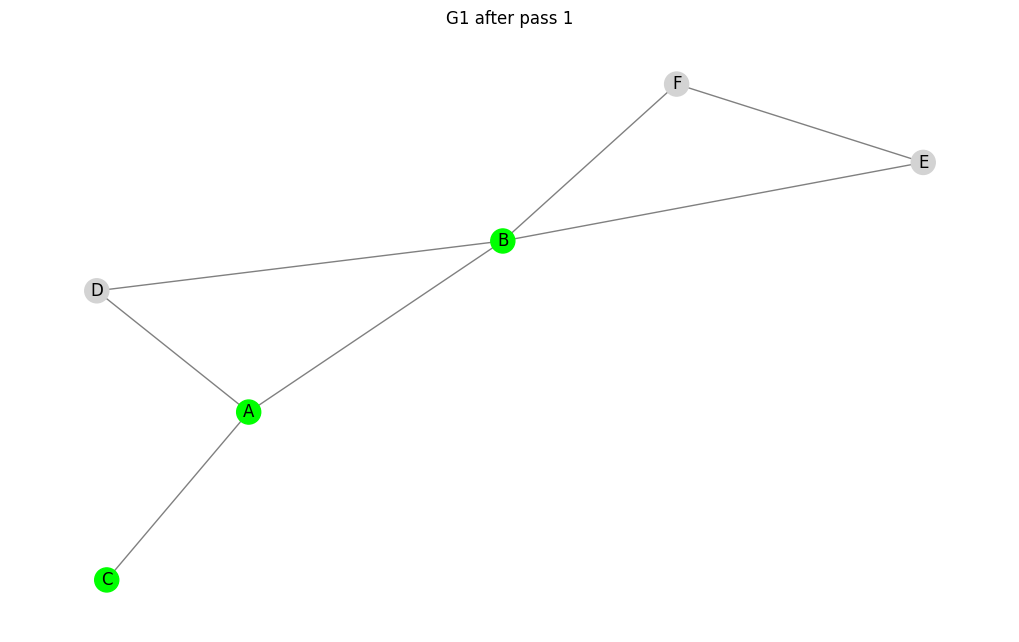

In [10]:
from utils import make_figure

# Re-creating the setup to keep the test cell independent

g_sigs_2_2 = GraphSignatures(graph=complex_graph)

# Run the first pass
made_progress = g_sigs_2_2.process_pass(pass_number=1)

# --- Perform checks ---
print("--- 2.2 Check first process_pass on complex graph ---")

check(
    ".1 process_pass should report that progress was made",
    made_progress == True
)

# Get all signatures after the pass
sigs = g_sigs_2_2.signatures_map
node_a_sig = sigs.get("A")
node_b_sig = sigs.get("B")
node_c_sig = sigs.get("C")
node_d_sig = sigs.get("D")
node_e_sig = sigs.get("E")
node_f_sig = sigs.get("F")

# Check the unique nodes that should now be finalized
check(".2 Node 'B' (nc=4) should be finalized", node_b_sig.is_finalized)
check(".3 Node 'A' (nc=3) should be finalized", node_a_sig.is_finalized)
check(".4 Node 'C' (nc=1) should be finalized", node_c_sig.is_finalized)

# Check the ambiguous group that should NOT be finalized
check(".5 Node 'D' (nc=2) should NOT be finalized",
      not node_d_sig.is_finalized)
check(".6 Node 'E' (nc=2) should NOT be finalized",
      not node_e_sig.is_finalized)
check(".7 Node 'F' (nc=2) should NOT be finalized",
      not node_f_sig.is_finalized)

# Optional: Check the final_index values based on descending neighbour_count sort
# B (nc=4) -> index 0
# A (nc=3) -> index 1
# D,E,F (nc=2) -> indices 2,3,4
# C (nc=1) -> index 5
check(".8 Node 'B' has correct final_index", node_b_sig.final_index == 0)
check(".9 Node 'A' has correct final_index", node_a_sig.final_index == 1)
check(".10 Node 'C' has correct final_index", node_c_sig.final_index == 5)

make_figure(g_sigs_2_2, "G1 after pass 1")

### 4.5.3 Pass 2

made_progress True


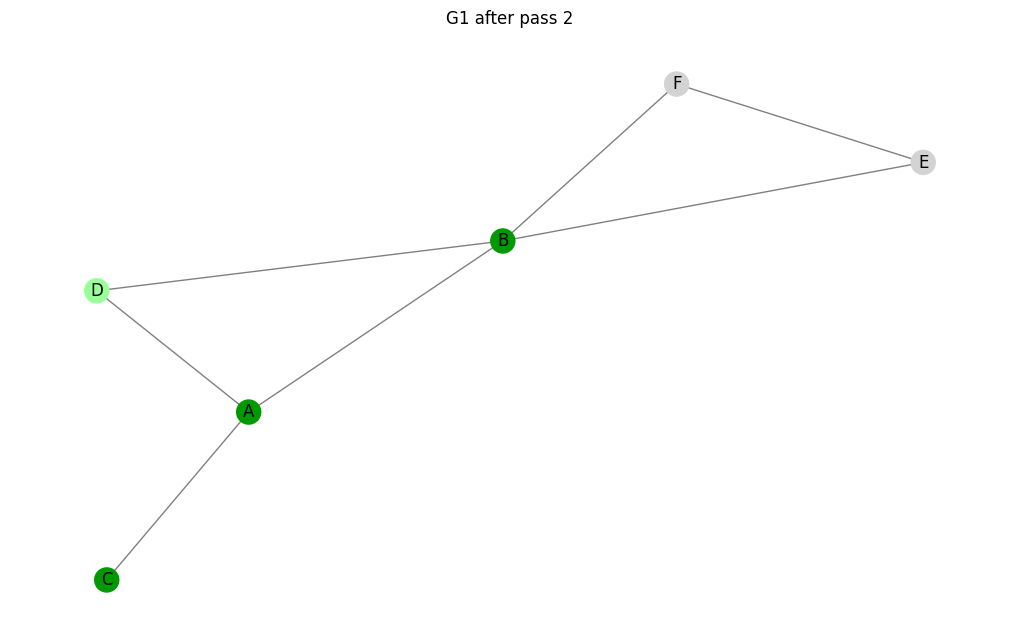

In [11]:
g_sigs_2_2.expand_ambiguous_nodes(pass_number=2)
made_progress = g_sigs_2_2.process_pass(pass_number=2)
print("made_progress", made_progress)

make_figure(g_sigs_2_2, "G1 after pass 2")

### 4.5.4 Pass 3

In [12]:
g_sigs_2_2.expand_ambiguous_nodes(pass_number=3)
made_progress = g_sigs_2_2.process_pass(pass_number=3)
print("made_progress", made_progress)


made_progress False
